In [2]:
# Benin Solar Data EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [3]:
# Load the Benin data
df = pd.read_csv('../data/benin-malanville.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [4]:
# Check basic info
print("=== BASIC INFO ===")
df.info()

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB     

In [5]:
# Check missing values
print("=== MISSING VALUES ===")
print(df.isna().sum())

=== MISSING VALUES ===
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
# Check basic info
print("=== BASIC INFO ===")
df.info()

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB     

In [7]:
# Check missing values
print("=== MISSING VALUES ===")
missing_values = df.isna().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

=== MISSING VALUES ===
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Total missing values: 525600


In [8]:
# Summary statistics
print("=== SUMMARY STATISTICS ===")
df.describe()

=== SUMMARY STATISTICS ===


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [9]:
# Check for outliers using Z-scores
print("=== OUTLIER DETECTION ===")
outlier_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = np.abs(stats.zscore(df[outlier_columns], nan_policy='omit'))
outlier_mask = (z_scores > 3).any(axis=1)

print(f"Outliers found: {outlier_mask.sum()}")
print(f"Percentage: {(outlier_mask.sum() / len(df)) * 100:.2f}%")

=== OUTLIER DETECTION ===
Outliers found: 7740
Percentage: 1.47%


In [10]:
# DATA CLEANING
print("=== DATA CLEANING ===")
df_clean = df.copy()

# Handle missing values
key_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
for col in key_columns:
    if df_clean[col].isna().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Imputed {col} with median: {median_val:.2f}")

# Remove outliers
df_clean = df_clean[~outlier_mask]
print(f"Original data: {len(df)} rows")
print(f"Clean data: {len(df_clean)} rows")
print(f"Data retention: {(len(df_clean)/len(df))*100:.2f}%")

=== DATA CLEANING ===
Original data: 525600 rows
Clean data: 517860 rows
Data retention: 98.53%


In [11]:
# Convert timestamp and create time features
print("=== TIME FEATURES ===")
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean['Hour'] = df_clean['Timestamp'].dt.hour
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Day'] = df_clean['Timestamp'].dt.day

print("Time features created successfully!")
print(df_clean[['Timestamp', 'Hour', 'Month', 'Day']].head())

=== TIME FEATURES ===
Time features created successfully!
            Timestamp  Hour  Month  Day
0 2021-08-09 00:01:00     0      8    9
1 2021-08-09 00:02:00     0      8    9
2 2021-08-09 00:03:00     0      8    9
3 2021-08-09 00:04:00     0      8    9
4 2021-08-09 00:05:00     0      8    9


=== GHI OVER TIME ===


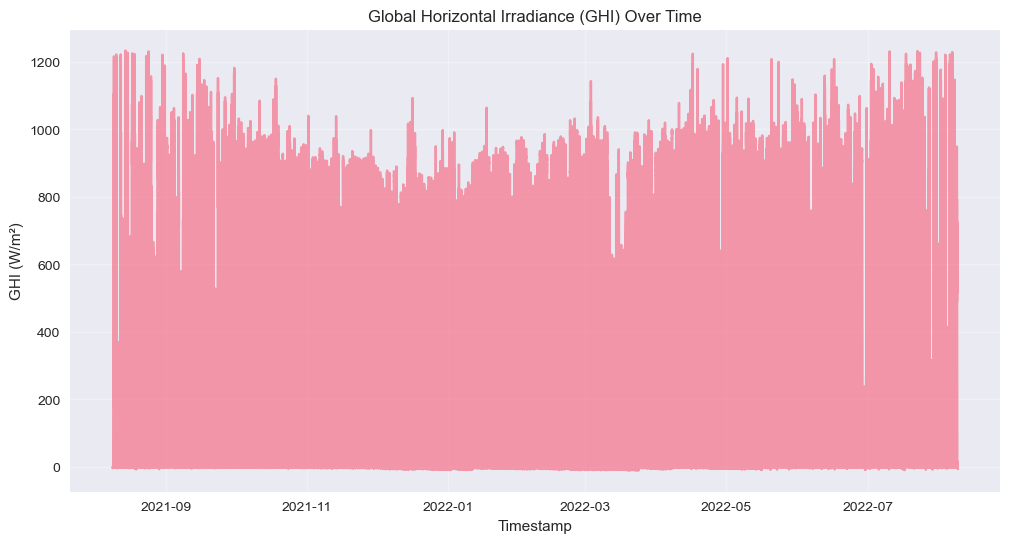

Max GHI: 1233.0 W/m²
Average GHI: 236.2 W/m²


In [12]:
# FIRST VISUALIZATION - GHI over time
print("=== GHI OVER TIME ===")
plt.figure(figsize=(12, 6))
plt.plot(df_clean['Timestamp'], df_clean['GHI'], alpha=0.7)
plt.title('Global Horizontal Irradiance (GHI) Over Time')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Timestamp')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Max GHI: {df_clean['GHI'].max():.1f} W/m²")
print(f"Average GHI: {df_clean['GHI'].mean():.1f} W/m²")

=== HOURLY GHI PATTERNS ===


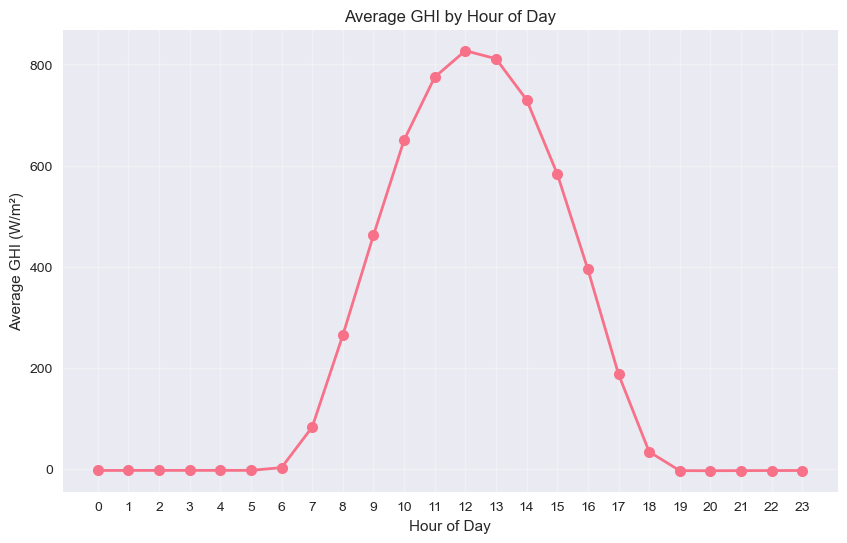

Peak solar hour: 12:00
Peak GHI: 827.1 W/m²


In [13]:
# DIURNAL PATTERNS - GHI by hour
print("=== HOURLY GHI PATTERNS ===")
hourly_ghi = df_clean.groupby('Hour')['GHI'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_ghi.index, hourly_ghi.values, marker='o', linewidth=2, markersize=8)
plt.title('Average GHI by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average GHI (W/m²)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

# Find peak solar hours
peak_hour = hourly_ghi.idxmax()
peak_ghi = hourly_ghi.max()
print(f"Peak solar hour: {peak_hour}:00")
print(f"Peak GHI: {peak_ghi:.1f} W/m²")

=== TEMPERATURE PATTERNS ===


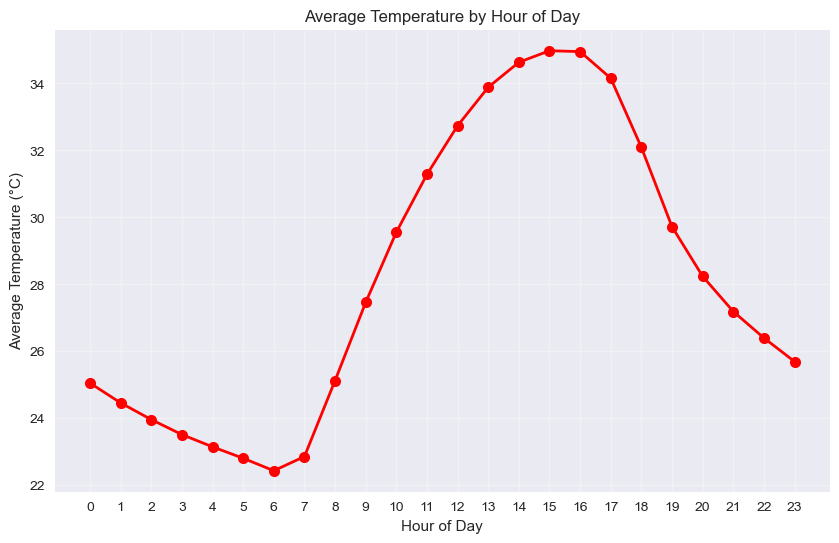

Max Temperature: 43.8°C
Min Temperature: 11.0°C


In [14]:
# TEMPERATURE ANALYSIS
print("=== TEMPERATURE PATTERNS ===")
hourly_temp = df_clean.groupby('Hour')['Tamb'].mean()

plt.figure(figsize=(10, 6))
plt.plot(hourly_temp.index, hourly_temp.values, marker='o', color='red', linewidth=2, markersize=8)
plt.title('Average Temperature by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.xticks(range(0, 24))
plt.show()

print(f"Max Temperature: {df_clean['Tamb'].max():.1f}°C")
print(f"Min Temperature: {df_clean['Tamb'].min():.1f}°C")

=== CORRELATION HEATMAP ===


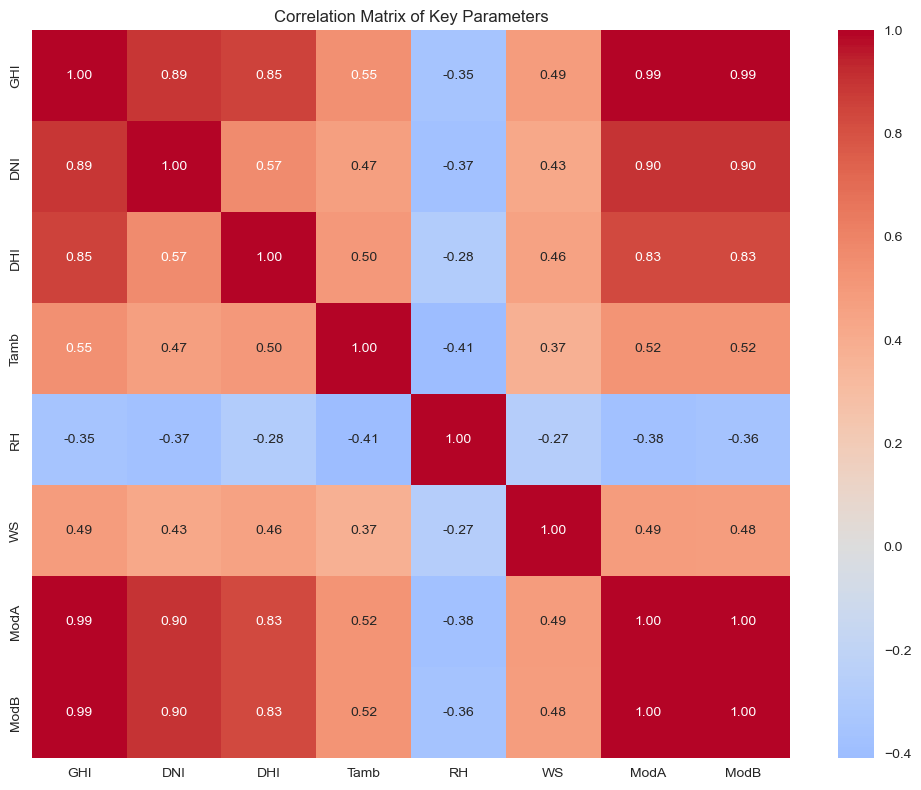

Top correlations with GHI:
GHI     1.000000
ModB    0.994882
ModA    0.994364
DNI     0.891074
DHI     0.851920
Tamb    0.545035
WS      0.485930
RH     -0.353637
Name: GHI, dtype: float64


In [15]:
# CORRELATION ANALYSIS
print("=== CORRELATION HEATMAP ===")
correlation_columns = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'ModA', 'ModB']
corr_matrix = df_clean[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Key Parameters')
plt.tight_layout()
plt.show()

# Top correlations with GHI
print("Top correlations with GHI:")
ghi_correlations = corr_matrix['GHI'].sort_values(ascending=False)
print(ghi_correlations)

=== DISTRIBUTION OF KEY VARIABLES ===


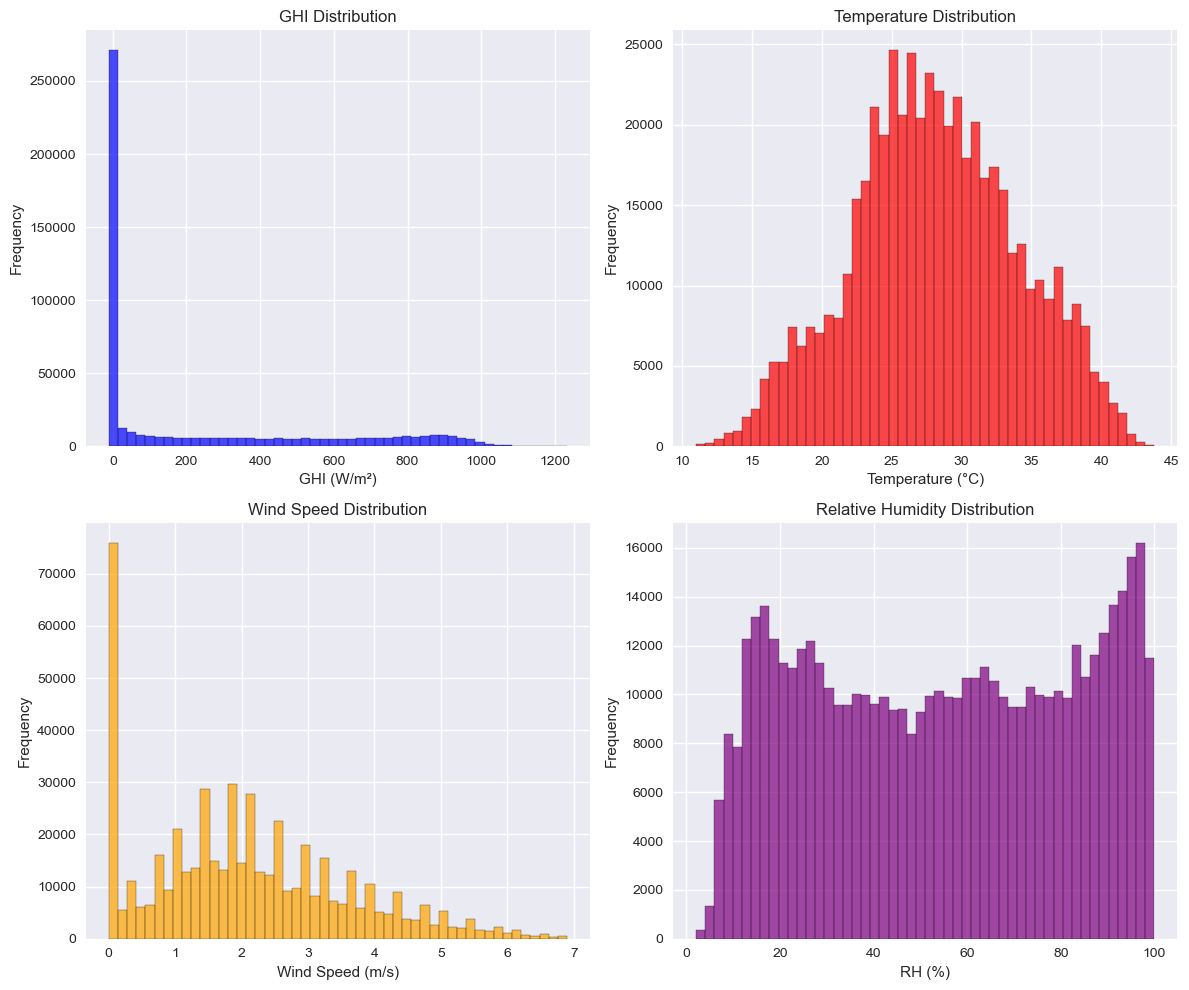

In [16]:
# DISTRIBUTION ANALYSIS
print("=== DISTRIBUTION OF KEY VARIABLES ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GHI Distribution
axes[0,0].hist(df_clean['GHI'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0,0].set_title('GHI Distribution')
axes[0,0].set_xlabel('GHI (W/m²)')
axes[0,0].set_ylabel('Frequency')

# Temperature Distribution
axes[0,1].hist(df_clean['Tamb'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[0,1].set_title('Temperature Distribution')
axes[0,1].set_xlabel('Temperature (°C)')
axes[0,1].set_ylabel('Frequency')

# Wind Speed Distribution
axes[1,0].hist(df_clean['WS'], bins=50, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].set_title('Wind Speed Distribution')
axes[1,0].set_xlabel('Wind Speed (m/s)')
axes[1,0].set_ylabel('Frequency')

# RH Distribution
axes[1,1].hist(df_clean['RH'], bins=50, alpha=0.7, color='purple', edgecolor='black')
axes[1,1].set_title('Relative Humidity Distribution')
axes[1,1].set_xlabel('RH (%)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

=== RELATIONSHIP ANALYSIS ===


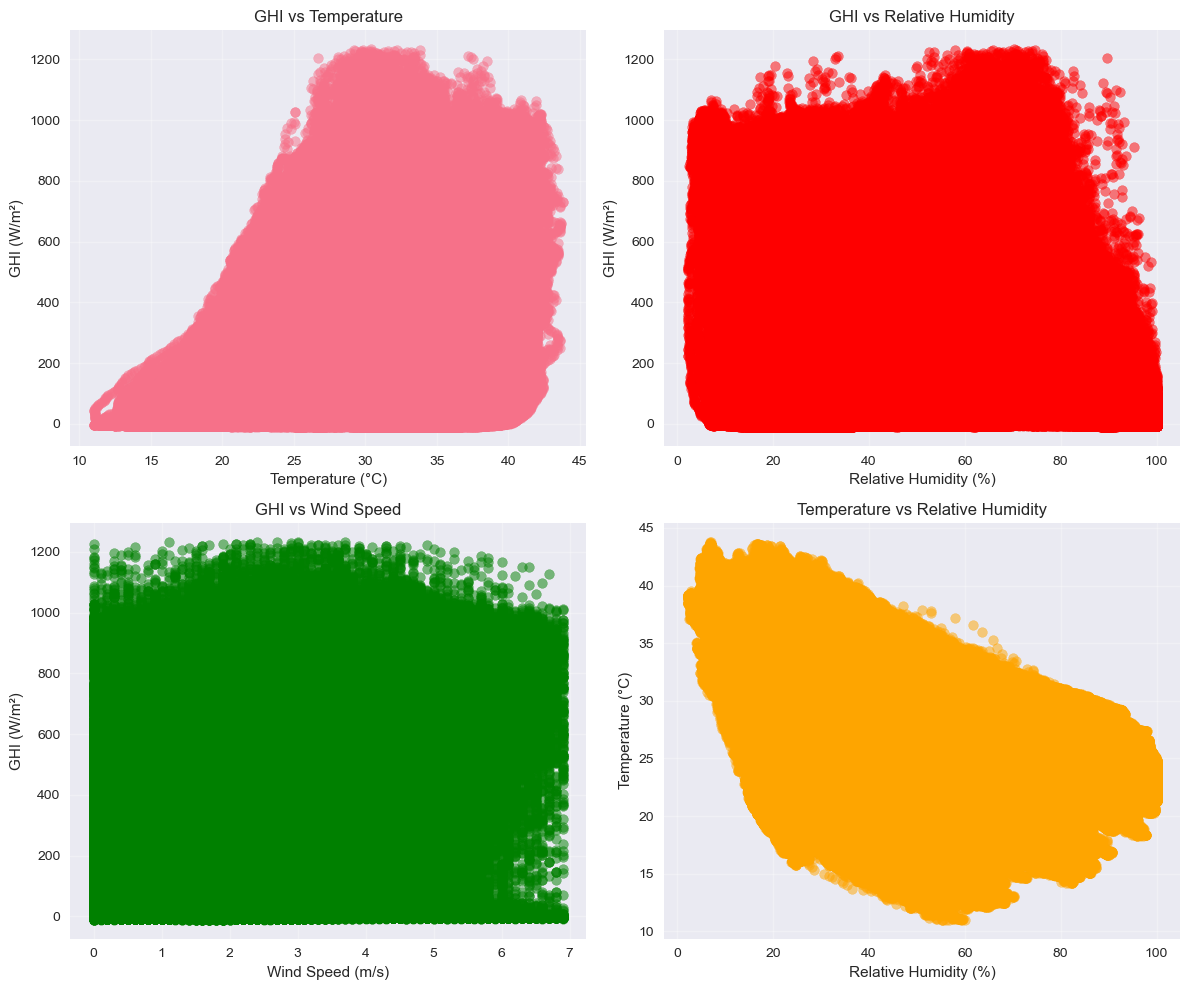

In [17]:
# SCATTER PLOTS - RELATIONSHIPS
print("=== RELATIONSHIP ANALYSIS ===")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# GHI vs Temperature
axes[0,0].scatter(df_clean['Tamb'], df_clean['GHI'], alpha=0.5)
axes[0,0].set_xlabel('Temperature (°C)')
axes[0,0].set_ylabel('GHI (W/m²)')
axes[0,0].set_title('GHI vs Temperature')
axes[0,0].grid(True, alpha=0.3)

# GHI vs RH
axes[0,1].scatter(df_clean['RH'], df_clean['GHI'], alpha=0.5, color='red')
axes[0,1].set_xlabel('Relative Humidity (%)')
axes[0,1].set_ylabel('GHI (W/m²)')
axes[0,1].set_title('GHI vs Relative Humidity')
axes[0,1].grid(True, alpha=0.3)

# GHI vs Wind Speed
axes[1,0].scatter(df_clean['WS'], df_clean['GHI'], alpha=0.5, color='green')
axes[1,0].set_xlabel('Wind Speed (m/s)')
axes[1,0].set_ylabel('GHI (W/m²)')
axes[1,0].set_title('GHI vs Wind Speed')
axes[1,0].grid(True, alpha=0.3)

# Temperature vs RH
axes[1,1].scatter(df_clean['RH'], df_clean['Tamb'], alpha=0.5, color='orange')
axes[1,1].set_xlabel('Relative Humidity (%)')
axes[1,1].set_ylabel('Temperature (°C)')
axes[1,1].set_title('Temperature vs Relative Humidity')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== BUBBLE CHART ANALYSIS ===


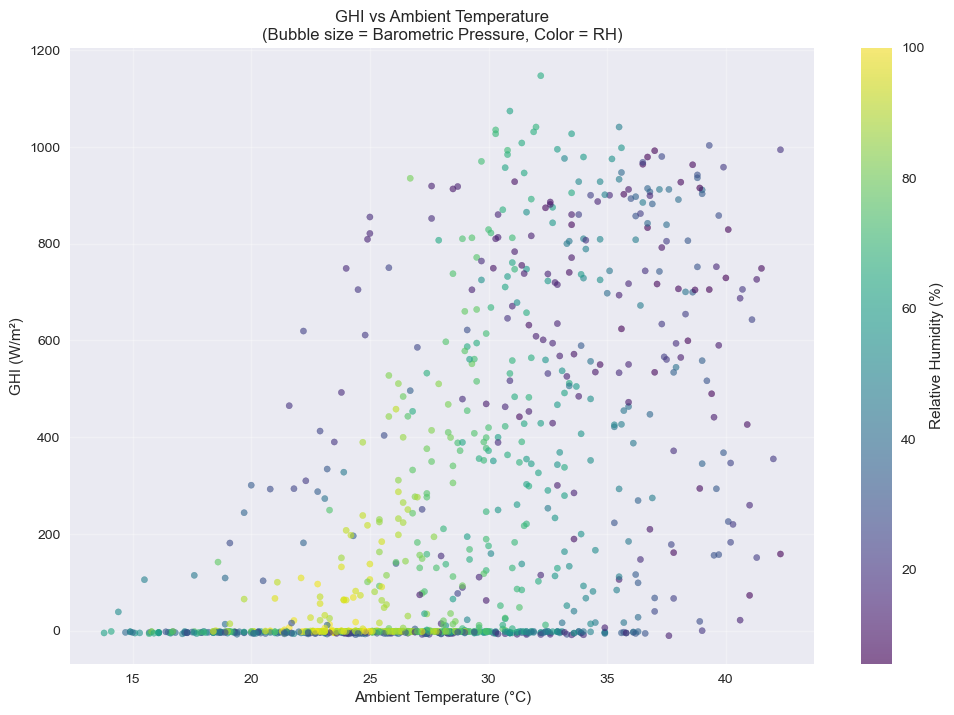

Bubble Chart Explanation:
• X-axis: Temperature | Y-axis: GHI
• Color: RH (darker = more humid)
• Bubble size: Barometric Pressure


In [18]:
# BUBBLE CHART - Advanced Visualization
print("=== BUBBLE CHART ANALYSIS ===")

plt.figure(figsize=(12, 8))

# Use a sample for better visualization
plot_sample = df_clean.sample(1000, random_state=42) if len(df_clean) > 1000 else df_clean

scatter = plt.scatter(plot_sample['Tamb'], plot_sample['GHI'], 
                     c=plot_sample['RH'], s=plot_sample['BP']/50, 
                     alpha=0.6, cmap='viridis')
plt.colorbar(scatter, label='Relative Humidity (%)')
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('GHI (W/m²)')
plt.title('GHI vs Ambient Temperature\n(Bubble size = Barometric Pressure, Color = RH)')
plt.grid(True, alpha=0.3)
plt.show()

print("Bubble Chart Explanation:")
print("• X-axis: Temperature | Y-axis: GHI")
print("• Color: RH (darker = more humid)")
print("• Bubble size: Barometric Pressure")

In [19]:
# EXPORT CLEANED DATA
print("=== EXPORTING CLEANED DATA ===")
df_clean.to_csv('../data/benin_clean.csv', index=False)
print("✅ Cleaned dataset exported to '../data/benin_clean.csv'")
print(f"Final clean dataset shape: {df_clean.shape}")

=== EXPORTING CLEANED DATA ===
✅ Cleaned dataset exported to '../data/benin_clean.csv'
Final clean dataset shape: (517860, 22)


In [20]:
# SUMMARY INSIGHTS
print("=== KEY FINDINGS SUMMARY ===")
print("\n🔬 DATA QUALITY:")
print(f"• Original data: {len(df):,} rows")
print(f"• Clean data: {len(df_clean):,} rows") 
print(f"• Data retention: {(len(df_clean)/len(df))*100:.1f}%")
print(f"• Outliers removed: {outlier_mask.sum():,} ({outlier_mask.sum()/len(df)*100:.1f}%)")

print("\n☀️ SOLAR POTENTIAL:")
print(f"• Max GHI: {df_clean['GHI'].max():.1f} W/m²")
print(f"• Average GHI: {df_clean['GHI'].mean():.1f} W/m²")
print(f"• Peak solar hour: {hourly_ghi.idxmax()}:00 ({hourly_ghi.max():.1f} W/m²)")

print("\n📊 KEY RELATIONSHIPS:")
print(f"• GHI-Temperature correlation: {corr_matrix.loc['GHI', 'Tamb']:.3f} (Strong)")
print(f"• GHI-RH correlation: {corr_matrix.loc['GHI', 'RH']:.3f} (Negative)")
print(f"• GHI-Wind correlation: {corr_matrix.loc['GHI', 'WS']:.3f} (Moderate)")

print("\n🌡️ ENVIRONMENTAL CONDITIONS:")
print(f"• Temperature range: {df_clean['Tamb'].min():.1f}°C to {df_clean['Tamb'].max():.1f}°C")
print(f"• RH range: {df_clean['RH'].min():.1f}% to {df_clean['RH'].max():.1f}%")
print(f"• Wind speed range: {df_clean['WS'].min():.1f} to {df_clean['WS'].max():.1f} m/s")

print("\n✅ EDA COMPLETED SUCCESSFULLY!")

=== KEY FINDINGS SUMMARY ===

🔬 DATA QUALITY:
• Original data: 525,600 rows
• Clean data: 517,860 rows
• Data retention: 98.5%
• Outliers removed: 7,740 (1.5%)

☀️ SOLAR POTENTIAL:
• Max GHI: 1233.0 W/m²
• Average GHI: 236.2 W/m²
• Peak solar hour: 12:00 (827.1 W/m²)

📊 KEY RELATIONSHIPS:
• GHI-Temperature correlation: 0.545 (Strong)
• GHI-RH correlation: -0.354 (Negative)
• GHI-Wind correlation: 0.486 (Moderate)

🌡️ ENVIRONMENTAL CONDITIONS:
• Temperature range: 11.0°C to 43.8°C
• RH range: 2.1% to 100.0%
• Wind speed range: 0.0 to 6.9 m/s

✅ EDA COMPLETED SUCCESSFULLY!
